In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#import linear regression model
from sklearn.linear_model import LinearRegression
sns.set(color_codes=True)

In [11]:
pwd

'C:\\Users\\ASUS\\Desktop\\great learning\\week6'

In [13]:
A=pd.read_csv('car_data.csv',index_col=0)
A.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [14]:
A['carb'].value_counts()

4    10
2    10
1     7
3     3
8     1
6     1
Name: carb, dtype: int64

In [15]:
A['cyl'].value_counts()

8    14
4    11
6     7
Name: cyl, dtype: int64

In [16]:
M=A.drop(['cyl','vs','am','gear','carb'],axis=1)
M.head()

,mpg,disp,hp,drat,wt,qsec
Mazda RX4,21.0,160.0,110,3.90,2.620,16.46
Mazda RX4 Wag,21.0,160.0,110,3.90,2.875,17.02
Datsun 710,22.8,108.0,93,3.85,2.320,18.61
Hornet 4 Drive,21.4,258.0,110,3.08,3.215,19.44
Hornet Sportabout,18.7,360.0,175,3.15,3.440,17.02


In [17]:
M.corr()

,mpg,disp,hp,drat,wt,qsec
mpg,1.000000,-0.847551,-0.776168,0.681172,-0.867659,0.418684
disp,-0.847551,1.000000,0.790949,-0.710214,0.887980,-0.433698
hp,-0.776168,0.790949,1.000000,-0.448759,0.658748,-0.708223
drat,0.681172,-0.710214,-0.448759,1.000000,-0.712441,0.091205
wt,-0.867659,0.887980,0.658748,-0.712441,1.000000,-0.174716
qsec,0.418684,-0.433698,-0.708223,0.091205,-0.174716,1.000000


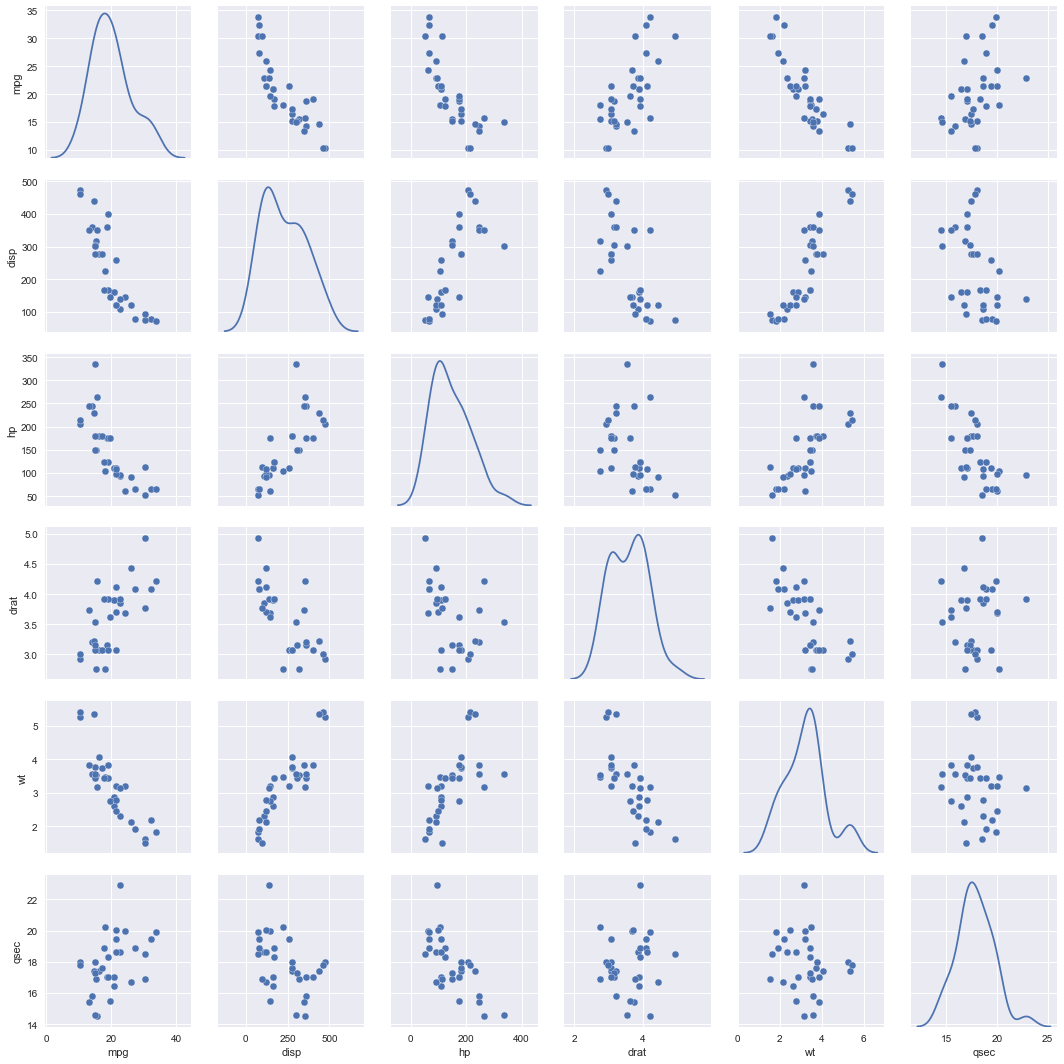

In [18]:
sns.pairplot(M,diag_kind='kde')
#y axis for the density plot is the frequency

In [19]:
M.describe().transpose()
#Talking about disp   Min-q1 (49) and max-q2(146) so it is right skewed

,count,mean,std,min,25%,50%,75%,max
mpg,32.0,20.090625,6.026948,10.400,15.42500,19.200,22.80,33.900
disp,32.0,230.721875,123.938694,71.100,120.82500,196.300,326.00,472.000
hp,32.0,146.687500,68.562868,52.000,96.50000,123.000,180.00,335.000
drat,32.0,3.596563,0.534679,2.760,3.08000,3.695,3.92,4.930
wt,32.0,3.217250,0.978457,1.513,2.58125,3.325,3.61,5.424
qsec,32.0,17.848750,1.786943,14.500,16.89250,17.710,18.90,22.900


In [20]:
x1=M['disp']
x2=M['hp']
x3=M['wt']
Y=M['mpg']

In [21]:
#Model 1
beta1=np.sum((x1-np.mean(x1))*(Y-np.mean(Y)))/np.sum((x1-np.mean(x1))**2)
beta0=np.mean(Y)-beta1*np.mean(x1)
y1=beta0+ beta1*x1


In [22]:
#Model 2
beta11=np.sum((x2-np.mean(x2))*(Y-np.mean(Y)))/np.sum((x2-np.mean(x2))**2)
beta01=np.mean(Y)-beta1*np.mean(x2)
y2=beta01+ beta11*x2

In [23]:
#Model 3
beta12=np.sum((x3-np.mean(x3))*(Y-np.mean(Y)))/np.sum((x3-np.mean(x3))**2)
beta02=np.mean(Y)-beta12*np.mean(x3)
y3=beta02+ beta12*x3
pd.DataFrame([Y,y1,y2,y3]).transpose()

,mpg,disp,hp,wt
Mazda RX4,21.0,23.005436,18.631257,23.282611
Mazda RX4 Wag,21.0,23.005436,18.631257,21.919770
Datsun 710,22.8,25.148622,19.791138,24.885952
Hornet 4 Drive,21.4,18.966354,18.631257,20.102650
Hornet Sportabout,18.7,14.762412,14.196419,18.900144
Valiant,18.1,20.326453,18.972399,18.793255
Duster 360,14.3,14.762412,9.420440,18.205363
Merc 240D,24.4,23.553597,21.906215,20.236262
Merc 230,22.8,23.796766,19.654681,20.450041
Merc 280,19.2,22.692201,17.744290,18.900144


In [24]:
Rsq_y1=np.sum((y1-np.mean(Y))**2)/np.sum((Y-np.mean(Y))**2)
Rsq_y2=np.sum((y2-np.mean(Y))**2)/np.sum((Y-np.mean(Y))**2)
Rsq_y3=np.sum((y3-np.mean(Y))**2)/np.sum((Y-np.mean(Y))**2)
print(Rsq_y1,Rsq_y2,Rsq_y3)

0.7183433404897297 1.048638119302399 0.7528327936582645


In [27]:
# model building using sk learn library
X=M[['disp', 'hp', 'wt']]
Y=M[['mpg']]

model= LinearRegression()

model.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
model.intercept_, model.coef_[0]

(array([37.10550527]),
 array([-9.37009081e-04, -3.11565508e-02, -3.80089058e+00]))

In [29]:
X1=M[['disp']]
X2=M[['hp']]
X3=M[['wt']]
Y=M[['mpg']]


In [36]:
#Model 1

model= LinearRegression()

model.fit(X1,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
# beta 1 and 0 value

model.intercept_, model.coef_[0]

(array([29.59985476]), array([-0.04121512]))

In [42]:
# R square value

model.score(X1,Y)

-0.524430026606328

In [39]:
#Model 2

model= LinearRegression()

model.fit(X2,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
model.intercept_, model.coef_[0]

(array([30.09886054]), array([-0.06822828]))

In [41]:
model.score(X2,Y)

0.602437341423934

In [43]:
#Model 3

model= LinearRegression()

model.fit(X3,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
model.intercept_, model.coef_[0]

(array([37.28512617]), array([-5.34447157]))

In [45]:
model.score(X3,Y)

0.7528327936582646

In [48]:
model= LinearRegression()

model.fit(X1, Y)

model.fit(X2,Y)
model.fit(X3,Y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Bivariate Model

In [49]:
X=M[['disp', 'hp', 'wt']]
X1=M[['disp']]
X2=M[['hp']]
X3=M[['wt']]
Y=M[['mpg']]

B1=M[['disp', 'hp']]
B2=M[['hp', 'wt']]
B3=M[['disp', 'wt']]
Y=M[['mpg']]

In [50]:
m1= LinearRegression()
m2= LinearRegression()
m3= LinearRegression()
m4= LinearRegression()
m5= LinearRegression()
m6= LinearRegression()
m7= LinearRegression()
m8= LinearRegression()



In [52]:
m1.fit(X1, Y)
m2.fit(X2, Y)
m3.fit(X3, Y)

m4.fit(B1, Y)
m5.fit(B2, Y)
m6.fit(B3, Y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [53]:
m4.score(B1,Y)

0.7482401820617401

In [54]:
m3.score(X3,Y)

0.7528327936582646

In [55]:
m2.score(X2,Y)

0.602437341423934

In [56]:
m1.score(X1,Y)

0.7183433404897299

In [57]:
m5.score(B2,Y)

0.8267854518827914

In [58]:
m6.score(B3,Y)

0.7809305816592922